<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Regression_Polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #predictions des ventes en utiliant la regression polynomiale

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/08-Modèles-de-Régression-Linéaire/Datasets/Advertising.csv')

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
X = df.drop('sales', axis=1) # nos caracteristiq

y = df['sales'] # colonne a predire

In [6]:
# import
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# convertisseur de features

polynomial_convert = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_convert.fit(X) # convertis les features

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_convert.transform(X) # Transformation de

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
#
from sklearn.model_selection import train_test_split

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(
  poly_features,
  y,
  test_size=0.3,
  random_state=101
  )


In [13]:
# import del a regression lineaire
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression() # instance de model lineaire regression

In [15]:
# adapter notre models sur nos donnees d'entrainement
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# variable de predictions
test_predictions = model.predict(X_test)

In [17]:
# evalutions les metrices de performance
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test, test_predictions)

In [19]:
MSE = mean_squared_error(y_test, test_predictions)

In [20]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [21]:
MAE

0.4896798044803838

In [22]:
RMSE

0.6646431757269274

In [23]:
# creer les differents ordres du polynome

# split les features poly en train/test

#Fit sur les donnees de training

# Stocker ou enregistrer l'erreur RMSE a la fois pour le set de training et le set de test

# Tracer les resultats (erreurs vs ordres du poly)

In [24]:
training_rmse_errors = [] # liste contenant les erreurs rmse  pour l'ensemble d'entrainement

test_rmse_errors = [] # liste contenant les erreurs rmse  pour l'ensemble de test

# boucle creant un convertisseur  de diferent features polynomiales
for d in range(1,10):
  polynomial_convert = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = polynomial_convert.fit_transform(X) # tansformation de nos features

  # separation de notre ensemble en ensemble de traitement et de test
  X_train, X_test, y_train, y_test = train_test_split(
        poly_features,
        y,
        test_size=0.3,
        random_state=101
  )

  # creation du model de regression lineaire
  model = LinearRegression()
  model.fit(X_train, y_train) # donnees d'entraineement

  # prediction sur 'ensemble d'entraiement
  train_pred = model.predict(X_train)

# prediction sur 'ensemble d'entraiement
  test_pred = model.predict(X_test)

  # Calcul des erreurs sur les predictions
  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  # ajoutons ces resultats rmse a nos listes initialisees
  training_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)


In [25]:
training_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.1992470718506088,
 5.421578379552841,
 0.1422460013426133,
 0.1681687270874676]

In [26]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825236476,
 0.5077742639859423,
 2.5758223594965197,
 4.3144980064363825,
 1379.170980279306,
 4026.0387775053014,
 95039.05513950267]

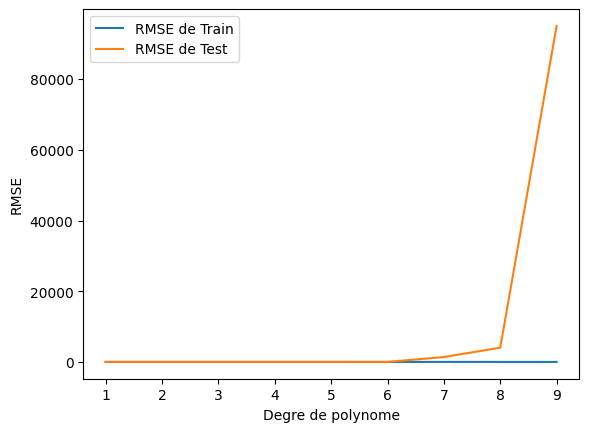

In [27]:
# visualisons  ces erreurs

plt.plot(range(1,10), training_rmse_errors, label='RMSE de Train')

plt.plot(range(1,10), test_rmse_errors, label='RMSE de Test')

plt.xlabel("Degre de polynome")
plt.ylabel('RMSE')

plt.legend()

In [28]:
# convertisseur polynomial final de degree=3 a sauvegarder
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

# model final
final_model = LinearRegression()

full_converted_x = final_poly_converter.fit_transform(X)

# Sauvegarde notre model
final_model.fit(full_converted_x, y)

LinearRegression()

In [29]:
# sauvegarde et chargement de notre model
from joblib import dump, load

In [30]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [31]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [32]:
# chargement du fichier de conertisseur
loaded_converter = load('final_converter.joblib')

In [33]:
# chargement du fichier du model
loaded_model = load('final_poly_model.joblib')

In [34]:
# Campagne publicitaire

compaign = [[149, 22, 12]]


In [35]:
#

transformed_data = loaded_converter.fit_transform(compaign)

In [36]:
# vente predicte
loaded_model.predict(transformed_data)

array([14.64501014])